# MAFS 6010S: Music Recommendation Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import cross_validation, grid_search, metrics, ensemble

C:\Users\Thompson\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Thompson\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train = pd.read_csv('train.csv')
train = train.sample(frac = 0.03)
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')
data_1 = pd.merge(train, songs, on = 'song_id', how = 'left')
data = pd.merge(data_1, members, on = 'msno', how = 'inner')

In [3]:
data

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,yERuUbdNifW9TlCUCC8oJMGfRXyXHKZJC6lhxhj9PnE=,/63Dbkqa+xFabwR8ScKtXIxv0/g2ERC4mSmJmYhzaSI=,my library,Local playlist more,local-playlist,1,392602.0,726,Super Simple Learning,NaN,NaN,52.0,5,0,male,7,20150406,20170909
1,yERuUbdNifW9TlCUCC8oJMGfRXyXHKZJC6lhxhj9PnE=,C9wSqzSJjlYDAwWNvIj0wtlCH0vShoex/xc3gmowmQg=,discover,Online playlist more,online-playlist,1,210964.0,444,BANGTAN BOYS,Pdogg,NaN,31.0,5,0,male,7,20150406,20170909
2,yERuUbdNifW9TlCUCC8oJMGfRXyXHKZJC6lhxhj9PnE=,hB6AoWeDJA5OiwX81JOkupcNKIC8z8PwVOlPBCxGG1s=,discover,Discover Chart,online-playlist,0,259599.0,921,Various Artists,Justin Hurwitz| Benj Pasek| Justin Paul,NaN,52.0,5,0,male,7,20150406,20170909
3,yERuUbdNifW9TlCUCC8oJMGfRXyXHKZJC6lhxhj9PnE=,aCVgrGu3aRmomSYV92dBi9UspCsXAx/RMN0KP+uypMg=,my library,Local playlist more,local-library,1,99567.0,726,The Little Singers,NaN,NaN,-1.0,5,0,male,7,20150406,20170909
4,yERuUbdNifW9TlCUCC8oJMGfRXyXHKZJC6lhxhj9PnE=,/v/kykkWxd8TpvdFCCWNjQPPX9JM8GPEX0i+iCehIFY=,discover,Online playlist more,online-playlist,0,238468.0,465,鄭伊健 (Ekin Cheng),陳光榮,林夕,24.0,5,0,male,7,20150406,20170909
5,yERuUbdNifW9TlCUCC8oJMGfRXyXHKZJC6lhxhj9PnE=,1/fMINWG1hufQlJcXlfZe9rz2W4uP2vDUIo0XB5P5NU=,discover,Online playlist more,online-playlist,1,214726.0,444,SHINHWA (神話),M Lee Min Woo/Devine Channel,M Lee Min Woo/Brian Kim,31.0,5,0,male,7,20150406,20170909
6,yERuUbdNifW9TlCUCC8oJMGfRXyXHKZJC6lhxhj9PnE=,jbdZcRCtbDjb19avmU2VkoMGiCkYa6GVYe0Tgmk1Q6E=,discover,Discover Genre,album,0,273312.0,458,汪睿 (Rio),紙片人,紙片人,3.0,5,0,male,7,20150406,20170909
7,yERuUbdNifW9TlCUCC8oJMGfRXyXHKZJC6lhxhj9PnE=,GXXDnAPyZYohOt1s5QzGsSjsNSrndrEsrkbWx3ybhhU=,discover,Discover Chart,online-playlist,0,230880.0,NaN,八三夭 (The Last Day of Summer 831),八三夭 阿璞,八三夭 阿璞,3.0,5,0,male,7,20150406,20170909
8,yERuUbdNifW9TlCUCC8oJMGfRXyXHKZJC6lhxhj9PnE=,irkZHHxQ5mGCIqSrw6Av02eLQBzCBV1/KeCXozhE3f4=,discover,Local playlist more,local-library,1,254720.0,458,邰正宵 (Samuel Tai),林亭翰,林亭翰,3.0,5,0,male,7,20150406,20170909
9,yERuUbdNifW9TlCUCC8oJMGfRXyXHKZJC6lhxhj9PnE=,/+EjD9XUSPEEThcX6MQglV0K6dyKQXuX6zptTSiCe/8=,discover,Online playlist more,online-playlist,1,248737.0,444,Yang Yoseop| Kim Juna,Oh Jun Sung,Kim Yu Gyeong,31.0,5,0,male,7,20150406,20170909


In [4]:
data.isnull().sum() / data.isnull().count() * 100
for i in data.select_dtypes(include = ['object']).columns:
    data[i][data[i].isnull()] = 'unknown'
data = data.fillna(value = 0)

C:\Users\Thompson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
data.expiration_date = pd.to_datetime(data.expiration_date,  format = '%Y%m%d', errors = 'ignore')
data['expiration_year'] = data['expiration_date'].dt.year
data['expiration_month'] = data['expiration_date'].dt.month
data['expiration_day'] = data['expiration_date'].dt.day
data.registration_init_time = pd.to_datetime(data.registration_init_time, format = '%Y%m%d', errors = 'ignore')
data['registration_year'] = data['registration_init_time'].dt.year
data['registration_month'] = data['registration_init_time'].dt.month
data['registration_day'] = data['registration_init_time'].dt.day

data['expiration_date'] = data['expiration_date'].astype('category')
data['registration_init_time'] = data['registration_init_time'].astype('category')

In [6]:
for temp in data.select_dtypes(include=['object']).columns:
    data[temp] = data[temp].astype('category') 
for temp in data.select_dtypes(include=['category']).columns:
    data[temp] = data[temp].cat.codes

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221323 entries, 0 to 221322
Data columns (total 24 columns):
msno                      221323 non-null int16
song_id                   221323 non-null int32
source_system_tab         221323 non-null int8
source_screen_name        221323 non-null int8
source_type               221323 non-null int8
target                    221323 non-null int64
song_length               221323 non-null float64
genre_ids                 221323 non-null int16
artist_name               221323 non-null int16
composer                  221323 non-null int16
lyricist                  221323 non-null int16
language                  221323 non-null float64
city                      221323 non-null int64
bd                        221323 non-null int64
gender                    221323 non-null int8
registered_via            221323 non-null int64
registration_init_time    221323 non-null int16
expiration_date           221323 non-null int16
expiration_year          

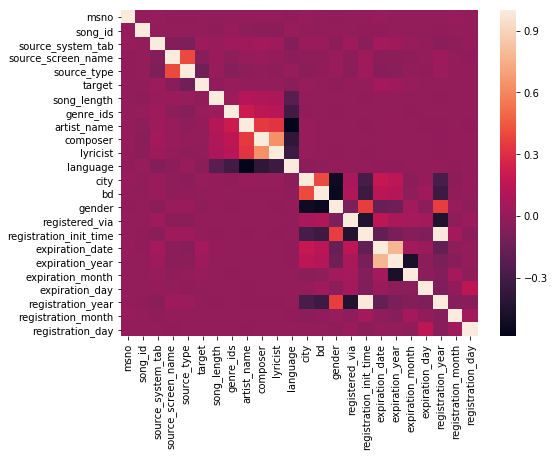

In [8]:
# correlation matrix of factors
plt.figure(figsize = [8,6])
sns.heatmap(data.corr())
plt.show()

In [9]:
data_all = data.copy(deep = True)
data_all_1 = data_all.pop('target')
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data_all, data_all_1, test_size = 0.4)

In [10]:
# Random forest model
forest_model = ensemble.RandomForestClassifier(n_estimators = 300, max_depth = 30)
forest_model.fit(train_data, train_labels)
predict_labels = forest_model.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels))

             precision    recall  f1-score   support

          0       0.66      0.63      0.64     44174
          1       0.65      0.68      0.66     44356

avg / total       0.65      0.65      0.65     88530



In [11]:
# factor contributuion
factor_plot = pd.DataFrame({'factor': data_all.columns[data_all.columns != 'target'], 'contribution': forest_model.feature_importances_})
factor_plot = factor_plot.sort_values('contribution', ascending=False)

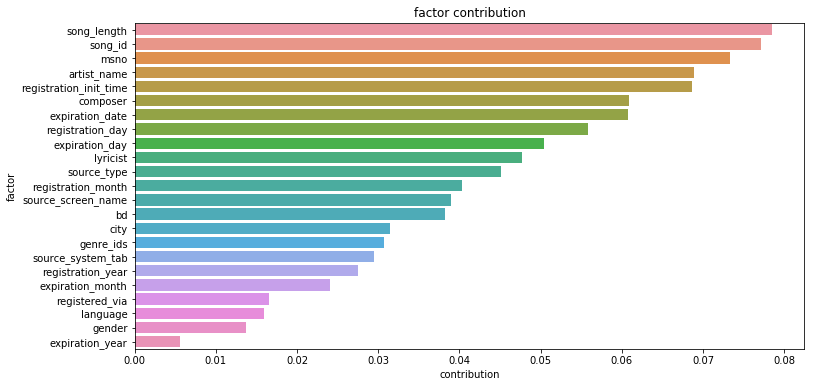

In [12]:
plt.figure(figsize=[12,6])
sns.barplot(x = factor_plot.contribution, y = factor_plot.factor)
plt.title('factor contribution')
plt.show()

In [13]:
# Select foctors with contribution > 0.04 (above registration_month)
data_all_improve = data.copy(deep = True)
data_all_improve = data_all_improve[['msno', 'song_id', 'song_length', 'source_type', 'artist_name', 'target',
                                     'composer', 'expiration_day', 'registration_init_time', 'registration_month', 'registration_day']]

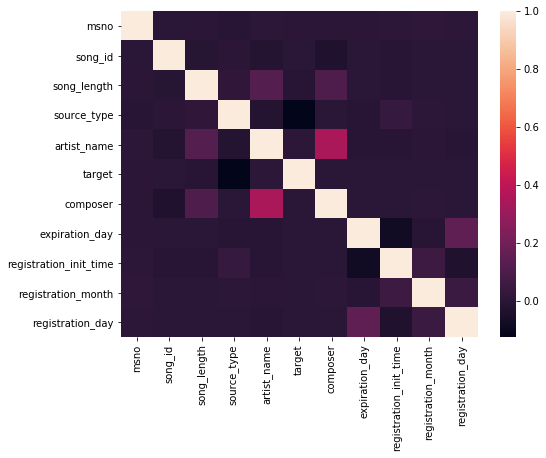

In [14]:
plt.figure(figsize = [8,6])
sns.heatmap(data_all_improve.corr())
plt.show()

In [15]:
data_all_improve_1 = data_all_improve.pop('target')
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data_all_improve, data_all_improve_1, test_size = 0.4)

In [16]:
# Random forest model
forest_model_improve = ensemble.RandomForestClassifier(n_estimators = 300, max_depth = 30)
forest_model_improve.fit(train_data, train_labels)
predict_labels_improve = forest_model_improve.predict(test_data)
print(metrics.classification_report(test_labels, predict_labels_improve))

             precision    recall  f1-score   support

          0       0.65      0.61      0.63     44123
          1       0.63      0.66      0.65     44407

avg / total       0.64      0.64      0.64     88530

